In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
X_train = pd.read_csv('X.train.csv')
X_test = pd.read_csv('X.test.csv')
Y_train = pd.read_csv('y.train.csv')

Выделим лишь вещественные признаки:

In [4]:
names = pd.read_csv('MetaData.csv')
names = names[names['Column Type'] == 'Numeric']['varnum'].values
names

array(['V2', 'V29', 'V31', 'V32', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
       'V105', 'V111', 'V113', 'V114', 'V116', 'V118', 'V144', 'V149',
       'V152', 'V157', 'V158', 'V161', 'V162', 'V165', 'V170', 'V175',
       'V180', 'V186', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193',
       'V195', 'V197', 'V198', 'V199', 'V201', 'V203', 'V204', 'V205',
       'V207', 'V208', 'V209', 'V235', 'V236', 'V237', 'V238', 'V239',
       'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247',
       'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255',
       'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263',
       'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271',
       'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279',
       'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287',
       'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295',
       'V296', 'V297', 'V298', 'V299', 'V300', 'V302', 'V303', 'V304',
 

In [6]:
X_train_numeric = X_train[names]
X_test_numeric = X_test[names]
X_train_numeric[:10]

,V2,V29,V31,V32,V34,V35,V36,V37,V38,V39,...,V320,V321,V322,V323,V324,V325,V326,V327,V328,V331
0,826.0,0.504950,0.263736,0.0,0.0,0.923077,0.446429,0.587213,0.693029,0.419803,...,0.506262,0.795181,0.433839,0.411634,0.000000,0.638849,0.648026,0.514303,0.179838,0.7
1,15.0,0.356436,0.329670,0.0,0.0,0.653846,0.523810,0.193190,0.324397,0.229685,...,0.304848,0.265060,0.086264,0.024492,0.666667,0.579496,0.410172,0.472586,0.108629,0.3
2,242.0,0.514851,0.197802,0.0,0.0,0.846154,0.464286,0.379430,0.623324,0.280448,...,0.312067,0.566265,0.359045,0.082382,0.000000,0.703597,0.530111,0.599523,0.157498,0.0
3,1038.0,0.554455,0.307692,0.0,0.0,0.846154,0.511905,0.330785,0.540214,0.273499,...,0.349492,0.686747,0.329900,0.183134,0.166667,0.643165,0.616650,0.530393,0.186819,0.3
4,971.0,0.415842,0.571429,0.0,0.0,0.923077,0.309524,0.209868,0.368633,0.228527,...,0.500810,0.674699,0.333528,0.240050,0.000000,0.632014,0.414727,0.513707,0.116169,0.8
5,170.0,0.554455,0.450549,0.0,0.0,0.961538,0.476190,0.184156,0.336461,0.214437,...,0.346840,0.638554,0.327910,0.141386,0.000000,0.630576,0.461285,0.523242,0.129573,0.5
6,67.0,0.455446,0.439560,0.0,0.0,0.884615,0.500000,0.496873,0.624665,0.380235,...,0.330779,0.566265,0.101130,0.156554,0.000000,0.519424,0.321862,0.424315,0.075956,0.6
7,10.0,0.485149,0.351648,0.0,0.0,1.000000,0.452381,0.434329,0.406166,0.444509,...,0.352144,0.686747,0.284310,0.189814,0.000000,0.569784,0.451164,0.473778,0.125663,0.7
8,210.0,0.316832,0.263736,0.0,0.0,0.923077,0.226190,0.537179,0.687668,0.381973,...,0.297038,0.843373,0.405337,0.437796,0.000000,0.617266,0.477227,0.509535,0.136275,0.5
9,1016.0,0.396040,0.395604,0.0,0.0,0.961538,0.357143,0.545518,0.419571,0.549701,...,0.302048,0.734940,0.315093,0.222794,0.000000,0.578058,0.455466,0.479738,0.127339,0.8


In [8]:
imputer = Imputer(strategy='most_frequent')
X_train_numeric = imputer.fit_transform(X_train_numeric.values)
X_test_numeric = imputer.transform(X_test_numeric.values)

Нормируем признаки

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
X_train_numeric = StandardScaler().fit_transform(X_train_numeric)
X_test_numeric = StandardScaler().fit_transform(X_test_numeric)

Попробуем knn

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
import matplotlib.pyplot as plt

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=200, n_jobs=-1)
-np.mean(cross_val_score(knn_classifier, X_train, Y_train.label.values, cv=5, scoring='neg_log_loss'))

0.28389597382439336

Обучим на полной выборке:

In [11]:
knn_classifier.fit(X_train, Y_train.label.values)
Y_test = pd.DataFrame()
Y_test['Id'] = np.arange(X_test.shape[0])
Y_test['kneighbors'] = knn_classifier.predict_proba(X_test)[:, 1]
Y_test['Prediction'] = Y_test['kneighbors']

In [12]:
Y_train['kneighbors'] = knn_classifier.predict_proba(X_train)[:, 1]

Рэндом форест:

In [13]:
rf_classifier = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)
-np.mean(cross_val_score(rf_classifier, X_train, Y_train.label.values, scoring='neg_log_loss', cv=5))

0.22548431399259167

In [14]:
rf_classifier.fit(X_train, Y_train.label.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [15]:
Y_train['RF_500'] = rf_classifier.predict_proba(X_train)[:, 1]
Y_test['RF_500'] = rf_classifier.predict_proba(X_test)[:, 1]

Смешаем knn и RF

In [17]:
from sklearn.metrics import log_loss

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

In [33]:
grid = np.linspace(0, 1, 10)

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

answers = []

for train_index, test_index in kf.split(X_train):
    first_classifier = KNeighborsClassifier(n_neighbors=200, n_jobs=-1)
    second_classifier = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

    first_classifier.fit(X_train[train_index], Y_train.label.values[train_index])
    second_classifier.fit(X_train[train_index], Y_train.label.values[train_index])

    print ('lol')
    
    for alpha in grid:
        blended_classifier = VotingClassifier(estimators=[('lol', first_classifier), ('kek', second_classifier)],
                                              voting='soft', weights=(alpha, 1 - alpha))
        
        blended_classifier.estimators_ = [first_classifier, second_classifier]

        y_score = blended_classifier.predict_proba(X_train[test_index])
        
        y_score = y_score[:, 1]
        
        answers.append(log_loss(Y_train.label.values[test_index], y_score))

lol
lol
lol
lol
lol


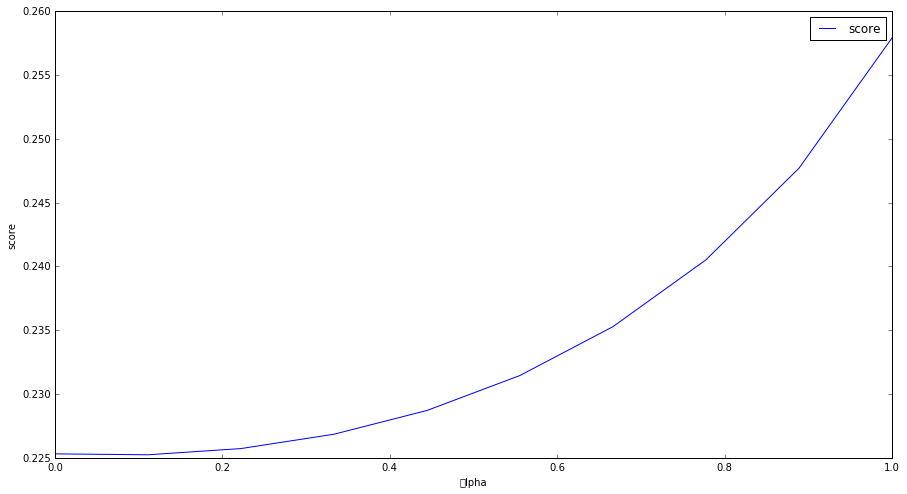

In [35]:
answers = np.array(answers).reshape(5, 10)

plt.figure(figsize=(15,8))

plt.plot(grid, answers.mean(axis=0), label='score')
plt.legend()
plt.xlabel('\alpha')
plt.ylabel('score')
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV

In [45]:
def search_and_draw(X, Y, algorithm, param_name, grid):
    parameters = {param_name: grid}
    classifier = GridSearchCV(estimator=algorithm, param_grid=parameters, cv=5, scoring='neg_log_loss', n_jobs=-1)
    classifier.fit(X, Y)
    
    plt.figure(figsize=(15,8))
    plt.title('choose ' + param_name)
    means = classifier.cv_results_['mean_test_score']
    error = classifier.cv_results_['std_test_score']

    plt.plot(grid, means, label='mean values of score')
    
    plt.fill_between(grid, means - 2 * error, means + 2 * error, color='green', label='filled area between errors')
    plt.legend()
    plt.xlabel('parameter')
    plt.ylabel('score')
    plt.show()

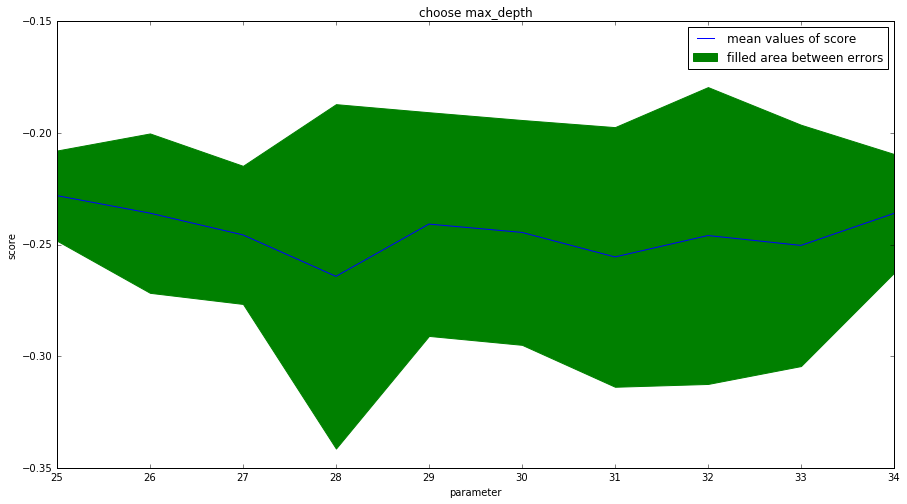

In [47]:
depth = np.arange(10) + 25

search_and_draw(X_train, Y_train.label.values, RandomForestClassifier(n_estimators=100), 'max_depth', depth)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
linear_clf = LogisticRegression()
-np.mean(cross_val_score(linear_clf, X_train_numeric, Y_train.label.values, scoring='neg_log_loss', cv=5))

0.24040321005568557

In [17]:
linear_clf.fit(X_train_numeric, Y_train.label.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
Y_test = pd.DataFrame()
Y_test['Id'] = np.arange(X_test.shape[0])
Y_test['Prediction'] = linear_clf.predict_proba(X_test_numeric)[:, 1]

Y_test.to_csv('my_solution.csv', index=False)